In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [2]:
data = pd.read_csv(r"data.csv")

In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G3_c
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,3
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,3
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,3
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,4
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,3


In [4]:
data.shape

(649, 34)

In [5]:
le_school = LabelEncoder()
le_sex = LabelEncoder()
le_address = LabelEncoder()
le_famsize = LabelEncoder()
le_Pstatus = LabelEncoder()
le_Mjob = LabelEncoder()
le_Fjob = LabelEncoder()
le_reason = LabelEncoder()
le_guardian = LabelEncoder()
le_schoolsup = LabelEncoder()
le_famsup = LabelEncoder()
le_paid = LabelEncoder()
le_activities = LabelEncoder()
le_nursery = LabelEncoder()
le_higher = LabelEncoder()
le_internet = LabelEncoder()
le_romantic = LabelEncoder()

In [6]:
data['school_n'] = le_school.fit_transform(data['school'])
data['sex_n'] = le_sex.fit_transform(data['sex'])
data['address_n'] = le_address.fit_transform(data['address'])
data['famsize_n'] = le_famsize.fit_transform(data['famsize'])
data['Pstatus_n'] = le_Pstatus.fit_transform(data['Pstatus'])
data['Mjob_n'] = le_Mjob.fit_transform(data['Mjob'])
data['Fjob_n'] = le_Fjob.fit_transform(data['Fjob'])
data['reason_n'] = le_reason.fit_transform(data['reason'])
data['guardian_n'] = le_guardian.fit_transform(data['guardian'])
data['schoolsup_n'] = le_schoolsup.fit_transform(data['schoolsup'])
data['famsup_n'] = le_famsup.fit_transform(data['famsup'])
data['paid_n'] = le_paid.fit_transform(data['paid'])
data['activities_n'] = le_activities.fit_transform(data['activities'])
data['nursery_n'] = le_nursery.fit_transform(data['nursery'])
data['higher_n'] = le_higher.fit_transform(data['higher'])
data['internet_n'] = le_internet.fit_transform(data['internet'])
data['romantic_n'] = le_romantic.fit_transform(data['romantic'])

In [7]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,reason_n,guardian_n,schoolsup_n,famsup_n,paid_n,activities_n,nursery_n,higher_n,internet_n,romantic_n
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,0,1,1,0,0,0,1,1,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,0,0,0,1,0,0,0,1,1,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,1,1,0,0,0,1,1,1,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,0,1,0,1,1,1,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,0,0,1,0,0,1,1,0,0


In [8]:
inputs_n = data.drop(['school','sex','address','famsize','Pstatus',
                      'Mjob','Fjob','reason','guardian','schoolsup',
                      'famsup','paid','activities','nursery','higher',
                      'internet','romantic', 'G3'],axis='columns')

In [9]:
inputs_n.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,reason_n,guardian_n,schoolsup_n,famsup_n,paid_n,activities_n,nursery_n,higher_n,internet_n,romantic_n
0,18,4,4,2,2,0,4,3,4,1,...,0,1,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,2,1,1,0,0,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,1,0,1,0,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,0,1,1,0,0


In [10]:
features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'school_n', 'sex_n', 'address_n', 'famsize_n', 'Pstatus_n',
       'Mjob_n', 'Fjob_n', 'reason_n', 'guardian_n', 'schoolsup_n', 'famsup_n',
       'paid_n', 'activities_n', 'nursery_n', 'higher_n', 'internet_n',
       'romantic_n']

In [11]:
features

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'school_n',
 'sex_n',
 'address_n',
 'famsize_n',
 'Pstatus_n',
 'Mjob_n',
 'Fjob_n',
 'reason_n',
 'guardian_n',
 'schoolsup_n',
 'famsup_n',
 'paid_n',
 'activities_n',
 'nursery_n',
 'higher_n',
 'internet_n',
 'romantic_n']

In [12]:
train, test = train_test_split(data, test_size = 0.3, random_state=20)

print(len(data))
print(len(train))
print(len(test))

649
454
195


In [13]:
dt = DecisionTreeClassifier()

x_train = train[features]
y_train = train['G3_c']

x_test = test[features]
y_test = test['G3_c']

dt = dt.fit(x_train, y_train)
y_pred1 = dt.predict(x_test)

In [14]:
dt_confusion_matrix = confusion_matrix(y_test,y_pred1)
score1 = (accuracy_score(y_test, y_pred1) * 100)
dt_accuracy_report = classification_report(y_test,y_pred1)

print("Decision Tree Classifier Confusion Mattrix: ")
print(dt_confusion_matrix)
print("\nDecision Tree Classifier Accuracy Report: ")
print(dt_accuracy_report)
print("Decision Tree Classifier Accuracy Score (%): ", score1)

Decision Tree Classifier Confusion Mattrix: 
[[ 2  1  1  0  0]
 [ 2 13  9  0  0]
 [ 0 12 79 13  0]
 [ 0  0 10 45  1]
 [ 0  0  0  3  4]]

Decision Tree Classifier Accuracy Report: 
              precision    recall  f1-score   support

           1       0.50      0.50      0.50         4
           2       0.50      0.54      0.52        24
           3       0.80      0.76      0.78       104
           4       0.74      0.80      0.77        56
           5       0.80      0.57      0.67         7

    accuracy                           0.73       195
   macro avg       0.67      0.64      0.65       195
weighted avg       0.74      0.73      0.73       195

Decision Tree Classifier Accuracy Score (%):  73.33333333333333


In [15]:
knn = KNeighborsClassifier()

x_train = train[features]
y_train = train['G3_c']

x_test = test[features]
y_test = test['G3_c']

knn.fit(x_train, y_train)
y_pred2 = knn.predict(x_test)

In [16]:
knn_confusion_matrix = confusion_matrix(y_test,y_pred2)
score2 = (accuracy_score(y_test, y_pred2) * 100)
knn_accuracy_report = classification_report(y_test,y_pred2)

print("k Nearest-Neighbour Classifier Confusion Mattrix: ")
print(knn_confusion_matrix)
print("\nk Nearest-Neighbour Classifier Accuracy Report: ")
print(knn_accuracy_report)
print("k Nearest-Neighbour Classifier Accuracy Score (%): ", score2)

k Nearest-Neighbour Classifier Confusion Mattrix: 
[[ 1  0  3  0  0]
 [ 2  9 13  0  0]
 [ 0  2 96  6  0]
 [ 0  1 17 38  0]
 [ 0  0  0  5  2]]

k Nearest-Neighbour Classifier Accuracy Report: 
              precision    recall  f1-score   support

           1       0.33      0.25      0.29         4
           2       0.75      0.38      0.50        24
           3       0.74      0.92      0.82       104
           4       0.78      0.68      0.72        56
           5       1.00      0.29      0.44         7

    accuracy                           0.75       195
   macro avg       0.72      0.50      0.56       195
weighted avg       0.75      0.75      0.73       195

k Nearest-Neighbour Classifier Accuracy Score (%):  74.87179487179488


In [17]:
svm = svm.SVC()

x_train = train[features]
y_train = train['G3_c']

x_test = test[features]
y_test = test['G3_c']

svm.fit(x_train, y_train)
y_pred3 = svm.predict(x_test)

D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [18]:
svm_confusion_matrix = confusion_matrix(y_test,y_pred3)
score3 = (accuracy_score(y_test, y_pred3) * 100)
svm_accuracy_report = classification_report(y_test,y_pred3)

print("Support Vector Machine Confusion Mattrix: ")
print(svm_confusion_matrix)
print("\nNaïve Bayes Classifier Accuracy Report: ")
print(svm_accuracy_report)
print("Support Vector Machine Accuracy Score (%): ", score3)

Support Vector Machine Confusion Mattrix: 
[[ 1  1  2  0  0]
 [ 1 13 10  0  0]
 [ 0  3 97  4  0]
 [ 0  0 12 44  0]
 [ 0  0  0  6  1]]

Naïve Bayes Classifier Accuracy Report: 
              precision    recall  f1-score   support

           1       0.50      0.25      0.33         4
           2       0.76      0.54      0.63        24
           3       0.80      0.93      0.86       104
           4       0.81      0.79      0.80        56
           5       1.00      0.14      0.25         7

    accuracy                           0.80       195
   macro avg       0.78      0.53      0.58       195
weighted avg       0.80      0.80      0.78       195

Support Vector Machine Accuracy Score (%):  80.0


In [19]:
nb = MultinomialNB()

x_train = train[features]
y_train = train['G3_c']

x_test = test[features]
y_test = test['G3_c']

nb.fit(x_train, y_train)
y_pred4 = nb.predict(x_test)

In [20]:
nb_confusion_matrix = confusion_matrix(y_test,y_pred4)
score4 = (accuracy_score(y_test, y_pred4) * 100)
nb_accuracy_report = classification_report(y_test,y_pred4)

print("Naïve Bayes Classifier Confusion Mattrix: ")
print(nb_confusion_matrix)
print("\nNaïve Bayes Classifier Accuracy Report: ")
print(nb_accuracy_report)
print("Naïve Bayes Classifier Accuracy Score (%): ", score4)

Naïve Bayes Classifier Confusion Mattrix: 
[[ 1  0  3  0  0]
 [ 1  9 14  0  0]
 [ 2  8 69 25  0]
 [ 0  1 20 34  1]
 [ 0  0  1  6  0]]

Naïve Bayes Classifier Accuracy Report: 
              precision    recall  f1-score   support

           1       0.25      0.25      0.25         4
           2       0.50      0.38      0.43        24
           3       0.64      0.66      0.65       104
           4       0.52      0.61      0.56        56
           5       0.00      0.00      0.00         7

    accuracy                           0.58       195
   macro avg       0.38      0.38      0.38       195
weighted avg       0.56      0.58      0.57       195

Naïve Bayes Classifier Accuracy Score (%):  57.948717948717956


In [21]:
rf = RandomForestRegressor()

x_train = train[features]
y_train = train['G3_c']

x_test = test[features]
y_test = test['G3_c']

rf.fit(x_train, y_train)
y_pred5 = rf.predict(x_test)

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [22]:
#rf_confusion_matrix = confusion_matrix(y_test,y_pred5)
#score5 = (accuracy_score(y_test, y_pred5) * 100)
#rf_accuracy_report = classification_report(y_test,y_pred5)

#print("Random Forest Classifier Confusion Mattrix: ")
#print(rf_confusion_matrix)
#print("\nRandom Forest Classifier Accuracy Report: ")
#print(rf_accuracy_report)
#print("Random Forest Classifier Accuracy Score (%): ", score5)

<function matplotlib.pyplot.show(*args, **kw)>

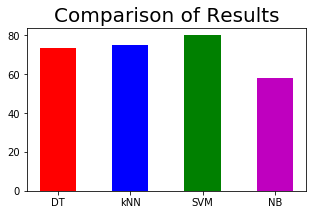

In [23]:
data = [score1, score2, score3, score4]
register = 0, 1, 2, 3
types = "DT", "kNN", "SVM", "NB"
plt.figure(figsize = (5, 3))
plt.bar(register, data, width = 0.5, color = ("r", "b", "g", "m"))
plt.title("Comparison of Results", fontsize = 20)
plt.xticks(register, types)
plt.show


#data = [score1, score2, score3, score4, score5]
#register = 0, 1, 2, 3, 4
#types = "DT", "kNN", "SVM", "NB", "RF"
#plt.figure(figsize = (5, 3))
#plt.bar(register, data, width = 0.5, color = ("r", "b", "g", "m", "y"))
#plt.title("Comparison of Results", fontsize = 20)
#plt.xticks(register, types)
#plt.show